import the libraries and data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Risk_Factors.csv to Risk_Factors.csv


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
dataset = pd.read_csv('./Risk_Factors.csv')

# Verify the imported data
dataset.head()

,Year,Fatal,Serious,Minor,Risk_Factor,Total_Crashes
0,2020,1081,2611,1666,Population Behaviour,5358
1,2019,835,2587,1740,Population Behaviour,5162
2,2018,830,2698,2013,Population Behaviour,5541
3,2017,720,2951,2027,Population Behaviour,5698
4,2016,710,3245,2612,Population Behaviour,6567






# **QUESTION ONE (a)**

In [ ]:
# This code produces the correlation Analysis graph in Figure one

dataset = dataset.drop(columns=['Risk_Factor'])
dataset.corr()

,Year,Fatal,Serious,Minor,Total_Crashes
Year,1.000000,0.034838,-0.068995,-0.132813,-0.078157
Fatal,0.034838,1.000000,0.836772,0.598245,0.832189
Serious,-0.068995,0.836772,1.000000,0.874706,0.986480
Minor,-0.132813,0.598245,0.874706,1.000000,0.928297
Total_Crashes,-0.078157,0.832189,0.986480,0.928297,1.000000


In [ ]:
y = dataset['Serious']
x = dataset['Total_Crashes']

# **QUESTION ONE (b)**

In [ ]:


# Generate the slope of the line (m) or cofficient
# Generate the y-intercept (b)
m, b = np.polyfit(x,y,1)
print ('The slope of line is {:.2f}.'.format(m))
print ('The y-intercept is {:.2f}.'.format(b))
print ('The best fit simple linear regression line is {:.2f}x + {:.2f}.'.format(m,b))

The slope of line is 0.47.
The y-intercept is -12.23.
The best fit simple linear regression line is 0.47x + -12.23.


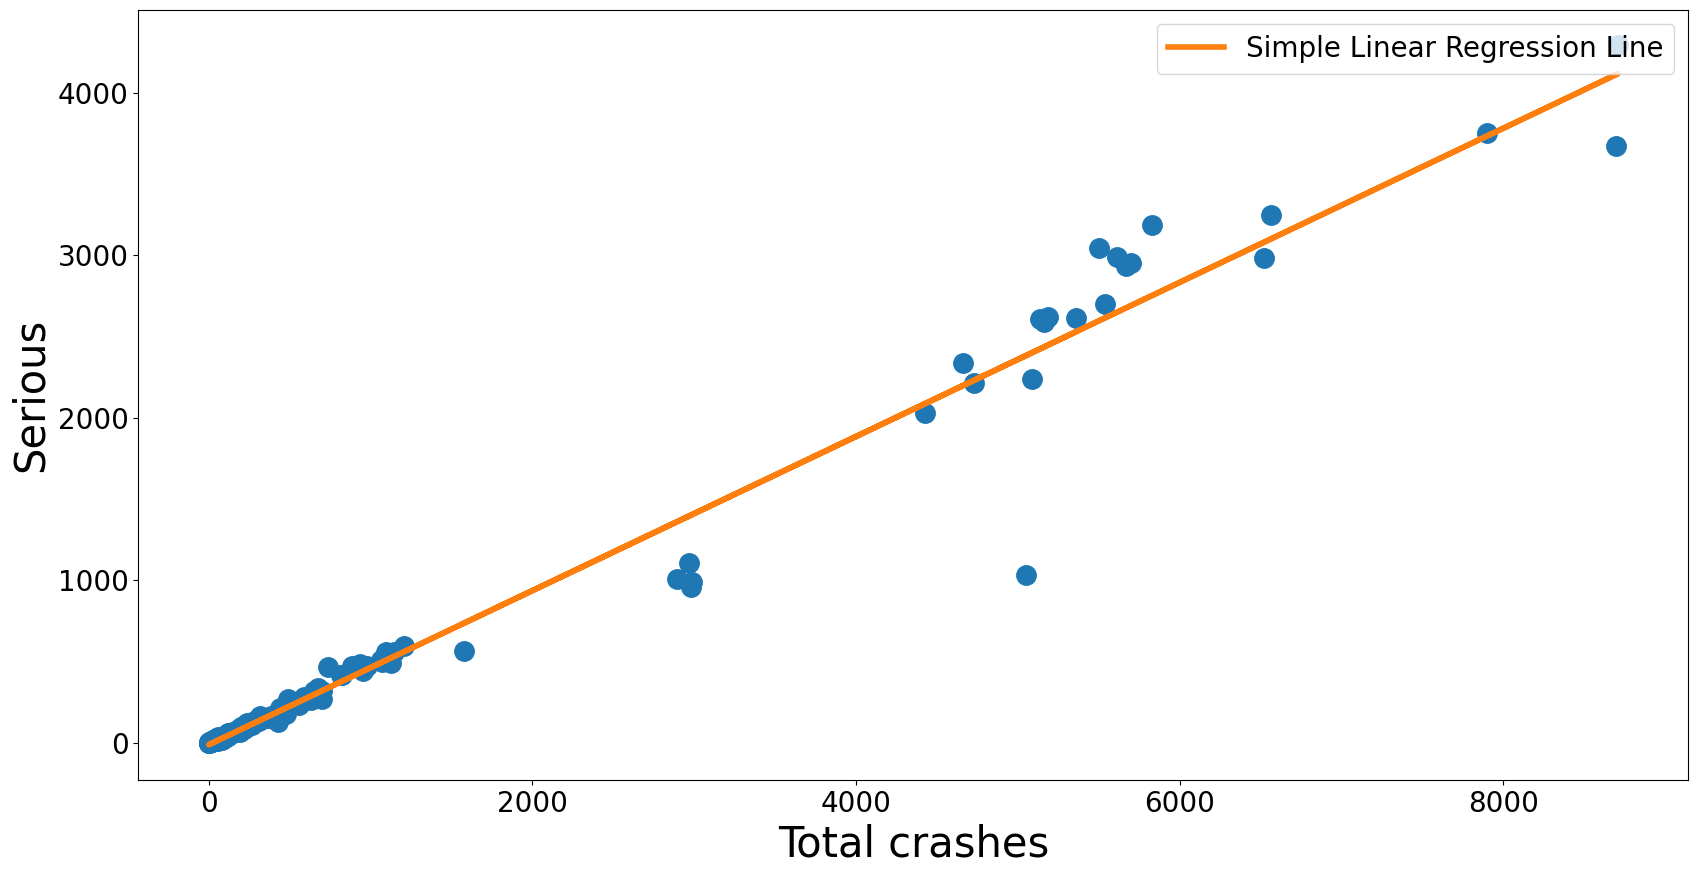

In [ ]:
# Create the plot inline
%matplotlib inline

# Enlarge the plot size
plt.figure(figsize=(20,10))

# Plot the scatter plot of the data set
plt.plot(x,y, 'o', markersize = 14)



# Plot the linear regression line
plt.plot(x, m*x + b, '-', label = 'Simple Linear Regression Line', linewidth = 4)

# Create the x and y axis labels
plt.ylabel('Serious', fontsize = 30)
plt.xlabel('Total crashes', fontsize = 30)

# Enlarge x and y tick marks
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)


# Create legend
plt.legend(loc = 'upper right', fontsize = 20)

## **QUESTION ONE (c)**

Calculate the slope and y-intercept of the linear regression line.

### **QUESTION ONE (d)**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
# Stating the simple linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Prediction result
y_pred_test = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)


# Evaluate the model
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print("Training R-squared:", r2_train)
print("Test R-squared:", r2_test)
print("Training Mean Squared Error:", mse_train)
print("Test Mean Squared Error:", mse_test)


Training R-squared: 0.9692985203060912
Test R-squared: 0.9837686405603125
Training Mean Squared Error: 29571.666683143376
Test Mean Squared Error: 19329.425569844054


# **QUESTION TWO (a)**

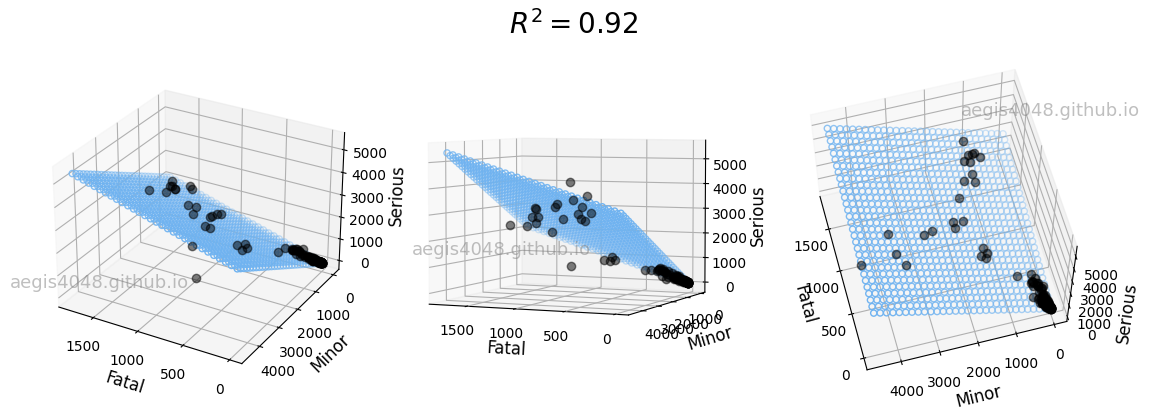

In [ ]:

from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

X = dataset[['Fatal', 'Minor']].values.reshape(-1,2)
Y = dataset['Serious']



x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(min(x),max(x), 30)
y_pred = np.linspace(min(y),max(y), 30)
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T



ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)



r2 = model.score(X, Y)


plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Fatal', fontsize=12)
    ax.set_ylabel('Minor', fontsize=12)
    ax.set_zlabel('Serious', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

# **QUESTION TWO (b)**

In [ ]:



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
# Define the data
X = dataset[['Fatal', 'Minor']].values
Y = dataset['Serious'].values

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred_test = model.predict(X_test)
Y_pred_train = model.predict(X_train)
# Print the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [1.27243224 0.68748886]
Intercept: -23.61145420455057


# **QUESTION 2 (c)**

It has two or more independent variables (X) and one dependent variable (Y), where Y is the value to be predicted. Thus, it is an approach for predicting a quantitative response using multiple features.

Equation: Y = β0 + β1X1 + β2X2 + β3X3 + … + βnXn + e

Y = Dependent variable / Target variable

β0 = Intercept of the regression line

β1, β2, β3, …. βn = Slope of the regression line which tells whether the line is increasing or decreasing

X1, X2, X3, ….Xn = Independent variable / Predictor variable

ε is the error term (the difference between the observed and predicted values of
𝑌
 accounting for randomness and variability not explained by the model).

In matrix form, the multiple linear regression model can be expressed as:

𝑌
=
𝑋
𝛽
+
𝜀
Y=Xβ+ε

Where:

𝑌
 is the vector of observed values of the dependent variable.

𝑋
 is the matrix of observed values of the independent variables, including a column of ones for the intercept.

𝛽
 is the vector of coefficients.

𝜀
 is the vector of error terms.

#  **QUESTION 2 (d)**


In [ ]:
# Evaluate the model
r2_train = r2_score(Y_train, Y_pred_train)
r2_test = r2_score(Y_test, Y_pred_test)

mse_train = mean_squared_error(Y_train, Y_pred_train)
mse_test = mean_squared_error(Y_test, Y_pred_test)

print("Training R-squared:", r2_train)
print("Test R-squared:", r2_test)
print("Training Mean Squared Error:", mse_train)
print("Test Mean Squared Error:", mse_test)


Training R-squared: 0.9156588328794422
Test R-squared: 0.9238333188651452
Training Mean Squared Error: 83998.26388241461
Test Mean Squared Error: 80365.3207578482
